# Detecting Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# What is an outlier

* Outliers may be data errors in data and should be detected and removed. 
* Outliers that are not errors can skew the results of analytic tools that are sensitive to the existence of outliers. 
* Outliers may be fraudulent entries.



# Tools to detect outliers

the tool used to detect outliers depend on the number of attributes involved. If we are interested in detecting outliers only based on one attribute, we call that **univariate outlier** detection; if we want to detect them based on two attributes, we call that **bivariate outlier** detection; and finally, if we want to detect outliers based on more than two attributes, we call that **multivariate outlier** detection.



## 1 Univariate outlier detection

### 1.1 Numerical attributes

For numerical attributes, we can use a boxplot or the [Q1-1.5*IQR, Q3+1.5*IQR] statistical range.


In [2]:
column_df = pd.read_csv('columns.csv')
column_df.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [3]:
response_df = pd.read_csv('responses.csv')
response_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


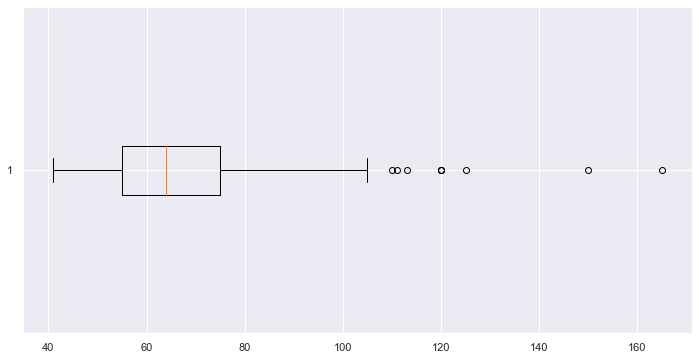

In [4]:
plt.figure(figsize=(12,6))
fig = plt.boxplot(response_df.Weight.dropna(), vert=False)
plt.show()

In [5]:
response_df[response_df.Weight > 105]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [6]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000002332EB2EAF0>, <matplotlib.lines.Line2D object at 0x000002332EB2EDC0>], 'caps': [<matplotlib.lines.Line2D object at 0x000002332F1EC190>, <matplotlib.lines.Line2D object at 0x000002332F1EC520>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002332EB2E6A0>], 'medians': [<matplotlib.lines.Line2D object at 0x000002332F1EC8B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002332F1ECC40>], 'means': []}


Each **matplotlib.lines.Line2D** object has the **.get_data()** function that gives you values that are shown on the plot. 'flier' in the **matplotlib.lines.Line2D**  dictionary are the outliers. they can be accessed as follows.


In [7]:

fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

### building boxpot's values

In [8]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1
upper_cap = Q3 + 1.5 * IQR
lower_cap = Q1 - 1.5 * IQR
BM = (response_df.Weight < lower_cap) | (response_df.Weight > upper_cap)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


### 1.2 Categorical attributes

Use frequency table or barchart to detect outliers

In [9]:
response_df.Education.value_counts()


secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

<AxesSubplot:>

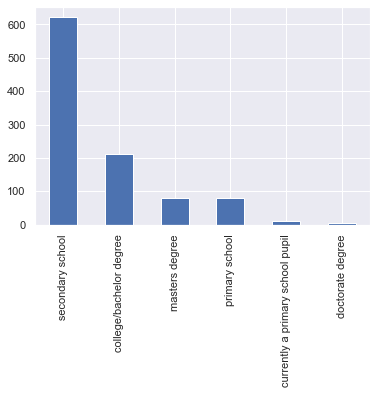

In [10]:
response_df.Education.value_counts().plot.bar()

## 2 Bivariate outlier detection

Bivariate outlier detection is across two attributes. In bivariate outlier detection, outliers are data objects whose combination of values across the two attributes is too different from the rest.


### 2.1 Numerical-numerical attributes

For numerical attributes Use a scatterplot. detect outliers when they are described by two numerical attributes, response_df.Height and response_df.Weight.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 864x576 with 0 Axes>

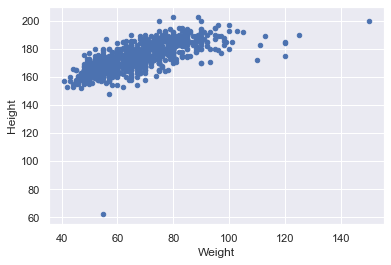

In [11]:
plt.figure(figsize=(12,8))
response_df.plot.scatter(x='Weight', y='Height')
plt.show()

we can clearly see two outliers, one with a Weight value larger than 140, and one with a Height value smaller than 70.


In [12]:
BM = (response_df.Weight > 130) | (response_df.Height < 70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


There are 3 data objects displayed  by the boolean mask but only two shows in the scatterplot. this is because one of the daata objects is missing the Height values.

### 2.2 categorical-categorical attributes

For categorical-categorical use a color-coded contingency table

In [38]:
# meaning of 'God'
column_df[column_df['short'] == 'God']

,original,short
103,I believe in God.,God


In [13]:
# create a contingency table
cont_table = pd.crosstab(response_df.Education, response_df.God)

In [14]:
cont_table

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


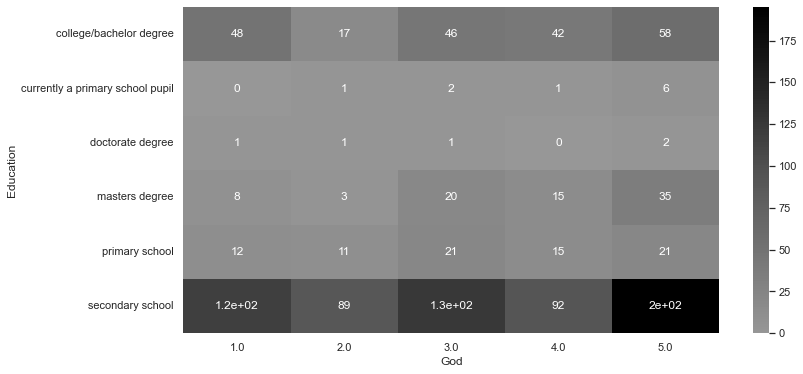

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(cont_table,annot=True, center=0.5, cmap='Greys')
plt.show()

In [42]:
response_df.query('Education== "currently a primary school pupil" & God==2') 


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [43]:
response_df.query('Education== "currently a primary school pupil" & God==4') 


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [44]:
response_df.query('Education== "doctorate degree" & God==1') 


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [45]:
response_df.query('Education== "doctorate degree" & God==2') 


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [46]:
response_df.query('Education== "doctorate degree" & God==3')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


### 2.3 For numerical-categorical attributes

 Use multiple boxplots

<AxesSubplot:xlabel='Age', ylabel='Education'>

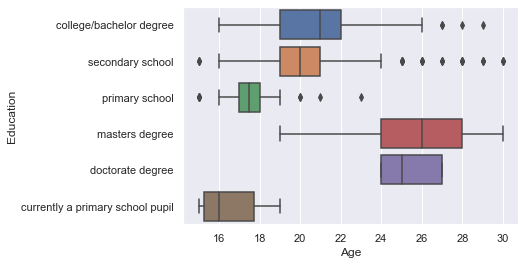

In [18]:
sns.boxplot(x=response_df.Age,y=response_df.Education)


In [19]:
response_df.Education.unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil', nan], dtype=object)

In [20]:
BM1 = (response_df.Education == 'college/bachelor degree') & (response_df.Age > 26)
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age > 24) | (response_df.Age < 16))
BM3 = (response_df.Education == 'primary school') & ((response_df.Age > 19) | (response_df.Age < 16))
BM = BM1 | BM2 | BM3

In [21]:
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


## 3 Multivariate outlier detection

The best way to go about multivariate outlier detection is through clustering analysis. The following example features a case of multivariate outlier detection.



Example of detecting outliers across four attributes using clustering analysis


I will use K-mans algorithm to see whether wwe ahve outliers. If K-Means groups one data object or only a handful of data objects in one cluster, that will be our clue that there are multivariate outliers in our data. The one big weakness of the K-Means algorithm is that the number of clusters, k, must be specified. To ensure the K-Means algorithm's weakness will not stand in the way of effective outlier detection and to give the analysis the best chance of sucess, I will use different k values: 2, 3, 4, 5, 6, and 7.



In [29]:
dimensions = ['Country', 'Metal or Hardrock', 'Folk','Musical'] 
Xs = response_df[dimensions]


In [30]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


check whether all the missing values are from one of the data objects. if that is the case, the fact that one data object had more than two missing values could be a reason for concern. However if the missing values seem to be happening randomly across Xs, I may impute them with Q3+1.5*IQR. 

**Why not impute them with a central tendency?** The reason we don't is that we would decrease the likelihood of a data object with a missing value being detected as outliers if we imputed with a central tendency. We don't want to help a data object that has the potential to be an outlier with our missing value imputation.


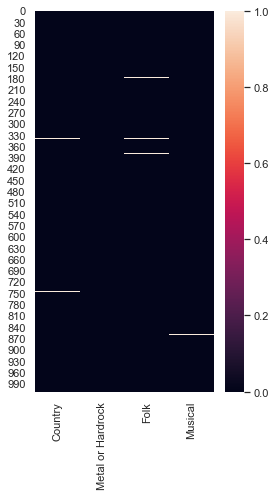

In [32]:

plt.figure(figsize=(4,7))
sns.heatmap(Xs.isna())
plt.show()

In [33]:
Q1 = Xs.quantile(0.25)
Q3 = Xs.quantile(0.75)
IQR = Q3-Q1
upper_cap = Q3 + 1.5 * IQR

Xs = Xs.fillna(upper_cap)

In [34]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1010 non-null   float64
 1   Metal or Hardrock  1010 non-null   float64
 2   Folk               1010 non-null   float64
 3   Musical            1010 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


I will standarize the dataset

In [37]:
# standarize the data before kmeans
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())

In [36]:
# building a loop to perform clustering analysis 
# for different Ks (i.e.,number of clusters)
from sklearn.cluster import KMeans
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    print('k={}'.format(k))
    for i in range(k):
        BM = kmeans.labels_ == i
        print('Cluster {}: {}'.format(i,Xs[BM].index.values))
    print('---------------------Divider-------------------------')
    


k=2
Cluster 0: [   1    2    5    8   12   15   18   19   20   21   24   26   32   34
   37   39   41   42   46   49   51   52   54   55   59   62   65   66
   68   75   82   83   84   85   86   89   91   93   96  100  101  104
  105  107  108  109  120  123  124  125  127  128  130  135  141  146
  147  150  151  154  157  159  160  161  166  167  169  172  175  176
  177  178  180  181  182  189  190  193  196  198  200  201  203  204
  205  206  209  210  214  216  221  222  224  226  227  231  233  234
  235  236  245  248  249  255  257  258  260  264  267  269  270  271
  272  275  276  277  280  281  291  293  295  300  301  303  307  312
  314  320  322  325  328  330  339  345  347  350  352  356  357  361
  362  363  364  365  367  369  370  371  377  381  383  384  385  386
  393  395  398  399  401  402  412  413  417  420  423  425  426  429
  432  433  435  438  444  452  454  471  473  475  476  477  479  481
  483  484  487  488  502  505  506  510  513  515  516  517  

Cluster 1: [   4    9   17   27   29   30   50   53   57   58   79   92  106  110
  111  121  133  134  136  139  148  155  156  162  174  186  191  198
  212  220  228  230  256  259  262  266  274  278  302  306  311  318
  334  335  340  343  344  348  358  359  378  379  380  382  388  391
  396  397  399  403  404  405  406  408  414  418  424  430  447  458
  461  464  467  468  472  497  499  500  501  505  507  509  512  514
  521  525  530  540  548  550  551  553  554  557  561  569  575  584
  601  618  622  623  625  627  629  633  634  635  636  637  641  642
  644  648  654  664  671  672  680  696  698  701  710  711  713  714
  721  722  726  735  741  742  745  750  751  776  779  789  840  844
  847  849  853  859  891  899  905  907  913  925  929  938  944  954
  961  962  963  972  986  997 1000 1003 1009]
Cluster 2: [ 18  26  41  46  52  54  62  75  84  85  86  91  93 109 123 124 127 128
 150 154 157 159 172 176 177 178 181 182 193 201 205 209 210 221 222 226
 227

using the outputed report, we can see that under none of the Ks, has K-Means grouped one data object or a handful of data objects in one cluster. This will allow us to conclude that there is no multivariate outlier in Xs.
 

# END